What are the varous features that affect the price of a car?

In [1]:
#import all the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

First of all is to understand the data

In [2]:
#Load the dataset
data = pd.read_csv("Automobile price data _Raw_.csv")

In [3]:
#View the first five row
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
#See more information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
#Understand the statistical distribution of the data
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
#Check null values
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
#View all the columns
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

Clean the data

In [8]:
print("Symboling:", data['symboling'].unique())

Symboling: [ 3  1  2  0 -1 -2]


In [9]:
print("normalized-losses:", data['normalized-losses'].unique())

normalized-losses: ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']


In [10]:
#Replace "?" with null and convert to int
data['normalized-losses'] = data['normalized-losses'].replace("?",np.nan)
data['normalized-losses'] = pd.to_numeric(data['normalized-losses'])

In [11]:
print("normalized-losses:", data['normalized-losses'].unique())

normalized-losses: [ nan 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.]


In [12]:
print("make:", data['make'].unique())

make: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


In [13]:
print("fuel-type:", data['fuel-type'].unique())

fuel-type: ['gas' 'diesel']


In [14]:
print("aspiration:", data['aspiration'].unique())

aspiration: ['std' 'turbo']


In [15]:
print("num-of-doors:", data['num-of-doors'].unique())

num-of-doors: ['two' 'four' '?']


In [16]:
#Replace "?" with null 
data['num-of-doors'] = data['num-of-doors'].replace("?",np.nan)

In [17]:
#Replace "?" with null
print("num-of-doors:", data['num-of-doors'].unique())

num-of-doors: ['two' 'four' nan]


In [18]:
print("body-style:", data['body-style'].unique())

body-style: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


In [19]:
print("drive-wheels:", data['drive-wheels'].unique())

drive-wheels: ['rwd' 'fwd' '4wd']


In [20]:
print("engine-location:", data['engine-location'].unique())

engine-location: ['front' 'rear']


In [21]:
print("wheel-base:", data['wheel-base'].unique())

wheel-base: [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]


In [22]:
print("length:", data['length'].unique())

length: [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.9 157.9 172.  173.5
 173.6 158.7 169.7 166.3 168.7 176.2 175.6 183.5 187.8 171.7 159.3 165.7
 180.2 183.1 188.8]


In [23]:
print("width:", data['width'].unique())

width: [64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.7 67.2
 68.9 68.8]


In [24]:
print("height:", data['height'].unique())

height: [48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.8 50.6 59.8 50.2
 52.6 54.5 58.3 53.3 54.1 51.  53.5 51.4 52.8 47.8 49.6 55.5 54.4 56.5
 58.7 54.9 56.7 55.4 54.8 49.4 51.6 54.7 55.1 56.1 49.7 56.  50.5 55.2
 52.5 53.  59.1 53.9 55.6 56.2 57.5]


In [25]:
print("curb-weight:", data['curb-weight'].unique())

curb-weight: [2548 2823 2337 2824 2507 2844 2954 3086 3053 2395 2710 2765 3055 3230
 3380 3505 1488 1874 1909 1876 2128 1967 1989 2191 2535 2811 1713 1819
 1837 1940 1956 2010 2024 2236 2289 2304 2372 2465 2293 2734 4066 3950
 1890 1900 1905 1945 1950 2380 2385 2500 2410 2443 2425 2670 2700 3515
 3750 3495 3770 3740 3685 3900 3715 2910 1918 1944 2004 2145 2370 2328
 2833 2921 2926 2365 2405 2403 1889 2017 1938 1951 2028 1971 2037 2008
 2324 2302 3095 3296 3060 3071 3139 3020 3197 3430 3075 3252 3285 3485
 3130 2818 2778 2756 2800 3366 2579 2460 2658 2695 2707 2758 2808 2847
 2050 2120 2240 2190 2340 2510 2290 2455 2420 2650 1985 2040 2015 2280
 3110 2081 2109 2275 2094 2122 2140 2169 2204 2265 2300 2540 2536 2551
 2679 2714 2975 2326 2480 2414 2458 2976 3016 3131 3151 2261 2209 2264
 2212 2319 2254 2221 2661 2563 2912 3034 2935 3042 3045 3157 2952 3049
 3012 3217 3062]


In [26]:
print("engine-type:", data['engine-type'].unique())

engine-type: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


In [27]:
print("num-of-cylinders:", data['num-of-cylinders'].unique())

num-of-cylinders: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [28]:
print("engine-size:", data['engine-size'].unique())

engine-size: [130 152 109 136 131 108 164 209  61  90  98 122 156  92  79 110 111 119
 258 326  91  70  80 140 134 183 234 308 304  97 103 120 181 151 194 203
 132 121 146 171 161 141 173 145]


In [29]:
print("engine-size:", data['engine-size'].unique())

engine-size: [130 152 109 136 131 108 164 209  61  90  98 122 156  92  79 110 111 119
 258 326  91  70  80 140 134 183 234 308 304  97 103 120 181 151 194 203
 132 121 146 171 161 141 173 145]


In [30]:
print("fuel-system:", data['fuel-system'].unique())

fuel-system: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [31]:
print("bore:", data['bore'].unique())

bore: ['3.47' '2.68' '3.19' '3.13' '3.50' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3.34' '3.60' '2.92' '3.15' '3.43' '3.63' '3.54' '3.08' '?' '3.39' '3.76'
 '3.58' '3.46' '3.80' '3.78' '3.17' '3.35' '3.59' '2.99' '3.33' '3.70'
 '3.61' '3.94' '3.74' '2.54' '3.05' '3.27' '3.24' '3.01']


In [32]:
#Replace "?" with null and convert to numeric
data['bore'] = data['bore'].replace("?",np.nan)
data['bore'] = pd.to_numeric(data['bore'])

In [33]:
print("bore:", data['bore'].unique())

bore: [3.47 2.68 3.19 3.13 3.5  3.31 3.62 2.91 3.03 2.97 3.34 3.6  2.92 3.15
 3.43 3.63 3.54 3.08  nan 3.39 3.76 3.58 3.46 3.8  3.78 3.17 3.35 3.59
 2.99 3.33 3.7  3.61 3.94 3.74 2.54 3.05 3.27 3.24 3.01]


In [34]:
print("stroke:", data['stroke'].unique())

stroke: ['2.68' '3.47' '3.40' '2.80' '3.19' '3.39' '3.03' '3.11' '3.23' '3.46'
 '3.90' '3.41' '3.07' '3.58' '4.17' '2.76' '3.15' '?' '3.16' '3.64' '3.10'
 '3.35' '3.12' '3.86' '3.29' '3.27' '3.52' '2.19' '3.21' '2.90' '2.07'
 '2.36' '2.64' '3.08' '3.50' '3.54' '2.87']


In [35]:
#Replace "?" with null and convert to numeric
data['stroke'] = data['stroke'].replace("?",np.nan)
data['stroke'] = pd.to_numeric(data['stroke'])

In [36]:
print("stroke:", data['stroke'].unique())

stroke: [2.68 3.47 3.4  2.8  3.19 3.39 3.03 3.11 3.23 3.46 3.9  3.41 3.07 3.58
 4.17 2.76 3.15  nan 3.16 3.64 3.1  3.35 3.12 3.86 3.29 3.27 3.52 2.19
 3.21 2.9  2.07 2.36 2.64 3.08 3.5  3.54 2.87]


In [37]:
print("compression-ratio:", data['compression-ratio'].unique())

compression-ratio: [ 9.   10.    8.    8.5   8.3   7.    8.8   9.5   9.6   9.41  9.4   7.6
  9.2  10.1   9.1   8.1  11.5   8.6  22.7  22.   21.5   7.5  21.9   7.8
  8.4  21.    8.7   9.31  9.3   7.7  22.5  23.  ]


In [38]:
print("horsepower:", data['horsepower'].unique())

horsepower: ['111' '154' '102' '115' '110' '140' '160' '101' '121' '182' '48' '70'
 '68' '88' '145' '58' '76' '60' '86' '100' '78' '90' '176' '262' '135'
 '84' '64' '120' '72' '123' '155' '184' '175' '116' '69' '55' '97' '152'
 '200' '95' '142' '143' '207' '288' '?' '73' '82' '94' '62' '56' '112'
 '92' '161' '156' '52' '85' '114' '162' '134' '106']


In [39]:
#Replace "?" with null and convert to numeric
data['horsepower'] = data['horsepower'].replace("?",np.nan)
data['horsepower'] = pd.to_numeric(data['horsepower'])

In [40]:
print("horsepower:", data['horsepower'].unique())

horsepower: [111. 154. 102. 115. 110. 140. 160. 101. 121. 182.  48.  70.  68.  88.
 145.  58.  76.  60.  86. 100.  78.  90. 176. 262. 135.  84.  64. 120.
  72. 123. 155. 184. 175. 116.  69.  55.  97. 152. 200.  95. 142. 143.
 207. 288.  nan  73.  82.  94.  62.  56. 112.  92. 161. 156.  52.  85.
 114. 162. 134. 106.]


In [41]:
print("peak-rpm:", data['peak-rpm'].unique())

peak-rpm: ['5000' '5500' '5800' '4250' '5400' '5100' '4800' '6000' '4750' '4650'
 '4200' '4350' '4500' '5200' '4150' '5600' '5900' '5750' '?' '5250' '4900'
 '4400' '6600' '5300']


In [42]:
#Replace "?" with null and convert to numeric
data['peak-rpm'] = data['peak-rpm'].replace("?",np.nan)
data['peak-rpm'] = pd.to_numeric(data['peak-rpm'])

In [43]:
print("peak-rpm:", data['peak-rpm'].unique())

peak-rpm: [5000. 5500. 5800. 4250. 5400. 5100. 4800. 6000. 4750. 4650. 4200. 4350.
 4500. 5200. 4150. 5600. 5900. 5750.   nan 5250. 4900. 4400. 6600. 5300.]


In [44]:
print("highway-mpg:", data['highway-mpg'].unique())

highway-mpg: [27 26 30 22 25 20 29 28 53 43 41 38 24 54 42 34 33 31 19 17 23 32 39 18
 16 37 50 36 47 46]


In [45]:
print("price:", data['price'].unique())

price: ['13495' '16500' '13950' '17450' '15250' '17710' '18920' '23875' '?'
 '16430' '16925' '20970' '21105' '24565' '30760' '41315' '36880' '5151'
 '6295' '6575' '5572' '6377' '7957' '6229' '6692' '7609' '8558' '8921'
 '12964' '6479' '6855' '5399' '6529' '7129' '7295' '7895' '9095' '8845'
 '10295' '12945' '10345' '6785' '11048' '32250' '35550' '36000' '5195'
 '6095' '6795' '6695' '7395' '10945' '11845' '13645' '15645' '8495'
 '10595' '10245' '10795' '11245' '18280' '18344' '25552' '28248' '28176'
 '31600' '34184' '35056' '40960' '45400' '16503' '5389' '6189' '6669'
 '7689' '9959' '8499' '12629' '14869' '14489' '6989' '8189' '9279' '5499'
 '7099' '6649' '6849' '7349' '7299' '7799' '7499' '7999' '8249' '8949'
 '9549' '13499' '14399' '17199' '19699' '18399' '11900' '13200' '12440'
 '13860' '15580' '16900' '16695' '17075' '16630' '17950' '18150' '12764'
 '22018' '32528' '34028' '37028' '9295' '9895' '11850' '12170' '15040'
 '15510' '18620' '5118' '7053' '7603' '7126' '7775' '9960' '9233' 

In [46]:
#Replace "?" with null and convert to numeric
data['price'] = data['price'].replace("?",np.nan)
data['price'] = pd.to_numeric(data['price'])
print("price:", data['price'].unique())

price: [13495. 16500. 13950. 17450. 15250. 17710. 18920. 23875.    nan 16430.
 16925. 20970. 21105. 24565. 30760. 41315. 36880.  5151.  6295.  6575.
  5572.  6377.  7957.  6229.  6692.  7609.  8558.  8921. 12964.  6479.
  6855.  5399.  6529.  7129.  7295.  7895.  9095.  8845. 10295. 12945.
 10345.  6785. 11048. 32250. 35550. 36000.  5195.  6095.  6795.  6695.
  7395. 10945. 11845. 13645. 15645.  8495. 10595. 10245. 10795. 11245.
 18280. 18344. 25552. 28248. 28176. 31600. 34184. 35056. 40960. 45400.
 16503.  5389.  6189.  6669.  7689.  9959.  8499. 12629. 14869. 14489.
  6989.  8189.  9279.  5499.  7099.  6649.  6849.  7349.  7299.  7799.
  7499.  7999.  8249.  8949.  9549. 13499. 14399. 17199. 19699. 18399.
 11900. 13200. 12440. 13860. 15580. 16900. 16695. 17075. 16630. 17950.
 18150. 12764. 22018. 32528. 34028. 37028.  9295.  9895. 11850. 12170.
 15040. 15510. 18620.  5118.  7053.  7603.  7126.  7775.  9960.  9233.
 11259.  7463. 10198.  8013. 11694.  5348.  6338.  6488.  6918.  7898.

Choose removing the null values or filling it, I choose dropping/removing the null values

In [47]:
#Check the sum of null values
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [48]:
#Before dropping, let's see the normalized-losses and understand it to know if we should fill it
data["normalized-losses"].iloc[5:50]

5       NaN
6     158.0
7       NaN
8     158.0
9       NaN
10    192.0
11    192.0
12    188.0
13    188.0
14      NaN
15      NaN
16      NaN
17      NaN
18    121.0
19     98.0
20     81.0
21    118.0
22    118.0
23    118.0
24    148.0
25    148.0
26    148.0
27    148.0
28    110.0
29    145.0
30    137.0
31    137.0
32    101.0
33    101.0
34    101.0
35    110.0
36     78.0
37    106.0
38    106.0
39     85.0
40     85.0
41     85.0
42    107.0
43      NaN
44      NaN
45      NaN
46      NaN
47    145.0
48      NaN
49      NaN
Name: normalized-losses, dtype: float64

In [49]:
#From the values, I think it's okay to fill in with the mean value
data["normalized-losses"].mean()

122.0

In [50]:
data["normalized-losses"] = data["normalized-losses"].fillna(data["normalized-losses"].mean())

In [51]:
data["normalized-losses"].iloc[5:50]

5     122.0
6     158.0
7     122.0
8     158.0
9     122.0
10    192.0
11    192.0
12    188.0
13    188.0
14    122.0
15    122.0
16    122.0
17    122.0
18    121.0
19     98.0
20     81.0
21    118.0
22    118.0
23    118.0
24    148.0
25    148.0
26    148.0
27    148.0
28    110.0
29    145.0
30    137.0
31    137.0
32    101.0
33    101.0
34    101.0
35    110.0
36     78.0
37    106.0
38    106.0
39     85.0
40     85.0
41     85.0
42    107.0
43    122.0
44    122.0
45    122.0
46    122.0
47    145.0
48    122.0
49    122.0
Name: normalized-losses, dtype: float64

In [52]:
#View the null values again
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [53]:
#I think it's safe to drop the null values now
data = data.dropna(axis = 0)

In [54]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [55]:
data.iloc[5:20,:]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
11,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925.0
12,0,188.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970.0
13,0,188.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,21105.0
14,1,122.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,122.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized-losses  193 non-null    float64
 2   make               193 non-null    object 
 3   fuel-type          193 non-null    object 
 4   aspiration         193 non-null    object 
 5   num-of-doors       193 non-null    object 
 6   body-style         193 non-null    object 
 7   drive-wheels       193 non-null    object 
 8   engine-location    193 non-null    object 
 9   wheel-base         193 non-null    float64
 10  length             193 non-null    float64
 11  width              193 non-null    float64
 12  height             193 non-null    float64
 13  curb-weight        193 non-null    int64  
 14  engine-type        193 non-null    object 
 15  num-of-cylinders   193 non-null    object 
 16  engine-size        193 non

In [57]:
#Save the cleaned data
#data.to_csv("Clean_Automobile_dataset.csv")

Now we need to visualise the data

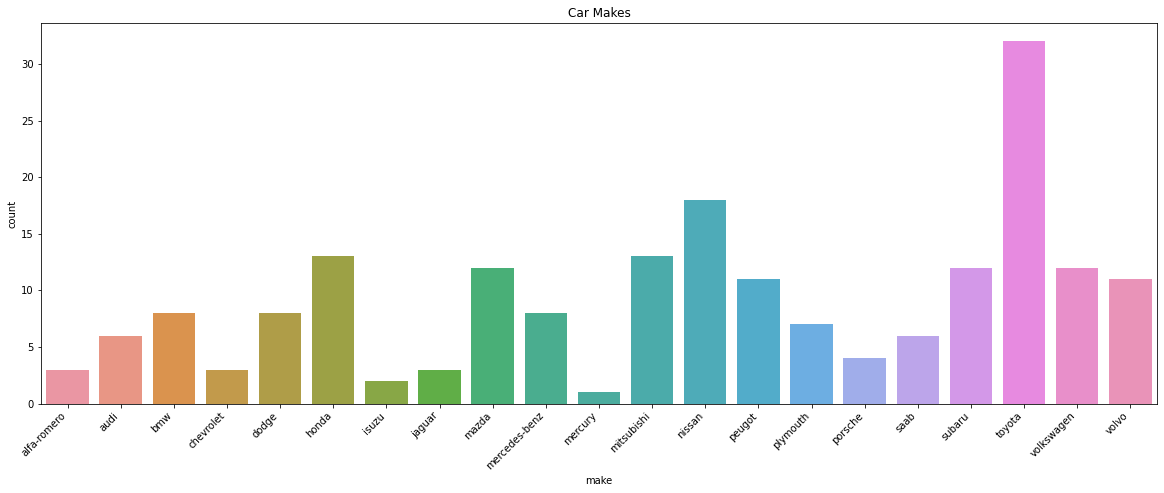

In [68]:
#Visualise the make to understand the car that has highest count
fig = plt.figure(figsize = (20, 7))
car = data["make"]
sns.countplot(x=car,data=data)
plt.title("Car Makes")
plt.xticks(rotation = 45, ha="right")
plt.savefig("Car_make_counts.png")
plt.show()

This shows that the majority of the care in the dataset is Toyota, followed by Nissan

In [59]:
data["make"].value_counts()

toyota           32
nissan           18
honda            13
mitsubishi       13
volkswagen       12
subaru           12
mazda            12
volvo            11
peugot           11
bmw               8
dodge             8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

<Figure size 1800x1800 with 0 Axes>

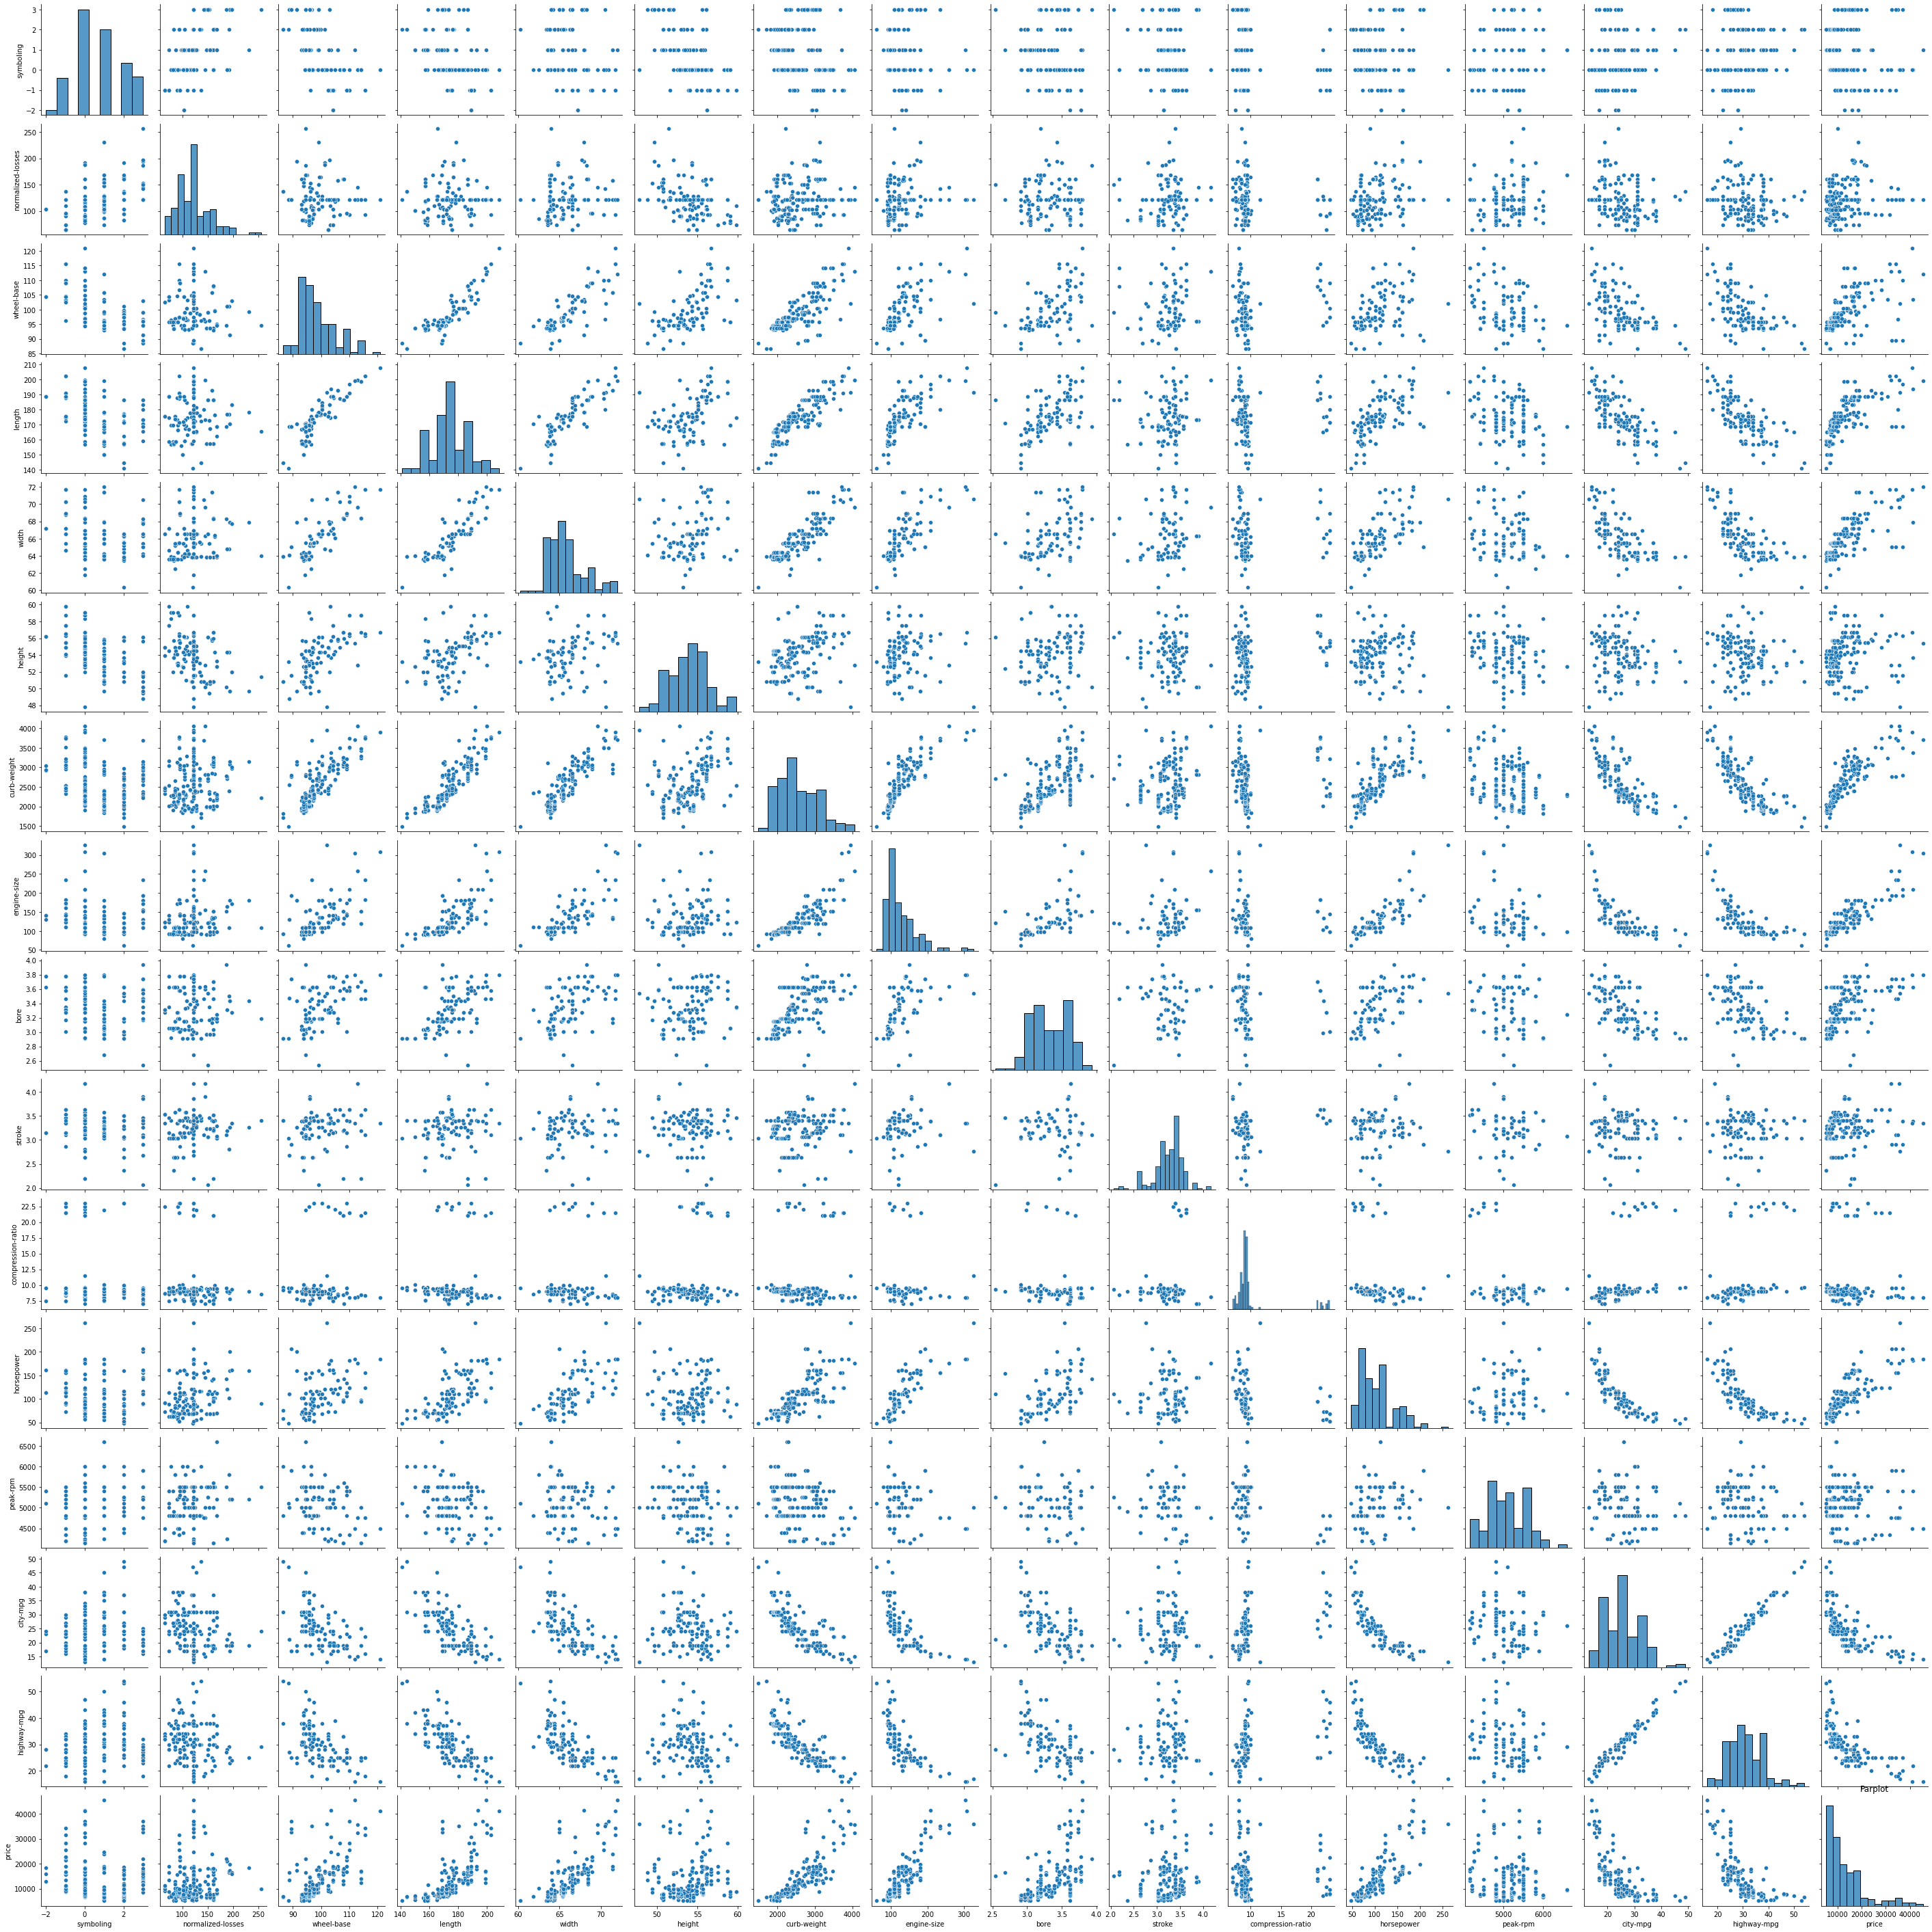

In [69]:
#Plot the pairplot of the data to see the relationships
fig = plt.figure(figsize = (25,25))
sns.pairplot(data)
plt.title("Parplot")
plt.savefig("pairplot_relationship.png")
plt.show()

In [61]:
#Visualise the corrolation
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.455135,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,0.085775,-0.084835
normalized-losses,0.455135,1.000000,-0.043395,0.033177,0.093666,-0.355796,0.108699,0.142821,-0.025608,0.054589,-0.112980,0.217727,0.213594,-0.208081,-0.166290,0.138700
wheel-base,-0.536516,-0.043395,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,-0.363194,0.033177,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,-0.247741,0.093666,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,-0.517803,-0.355796,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,-0.231086,0.108699,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
engine-size,-0.068327,0.142821,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778
bore,-0.144785,-0.025608,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295
stroke,-0.010884,0.054589,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007


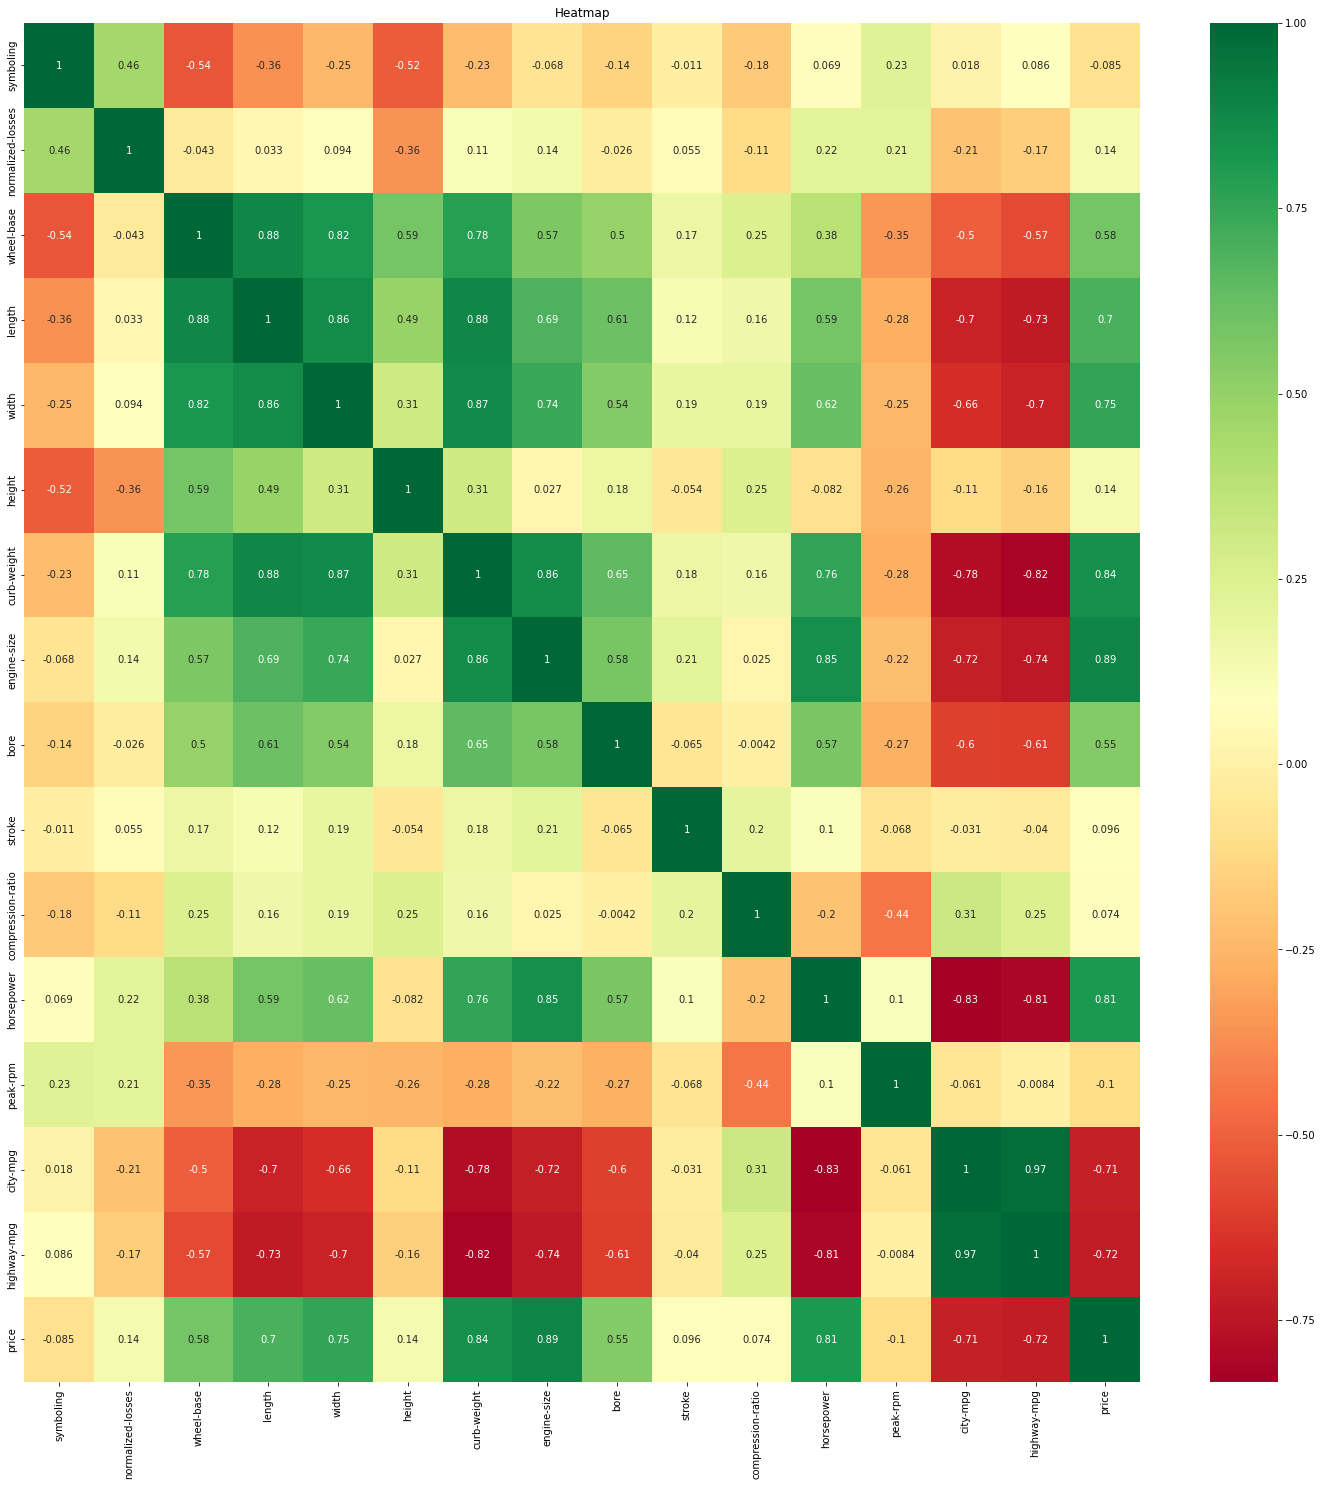

In [70]:
#To understand the corrolation better, use heatmap
fig = plt.figure(figsize = (25,25))
sns.heatmap(data = data.corr(), annot = True, cmap = "RdYlGn")
plt.title("Heatmap")
plt.savefig("Corr_heatmap.png")
plt.show()

From the above, it's clearly seen that the factors that influence the price are the Engine size, Curb weight(weight of the car without anyone) and Hourse power(The measure of the engine output) 

In [63]:
#How the car depends on features in ascending order from bottom
data.corr()["price"].sort_values()

highway-mpg         -0.719178
city-mpg            -0.706618
peak-rpm            -0.103835
symboling           -0.084835
compression-ratio    0.074483
stroke               0.096007
height               0.136234
normalized-losses    0.138700
bore                 0.546295
wheel-base           0.584951
length               0.695928
width                0.754649
horsepower           0.812453
curb-weight          0.835368
engine-size          0.888778
price                1.000000
Name: price, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_12548\161457569.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


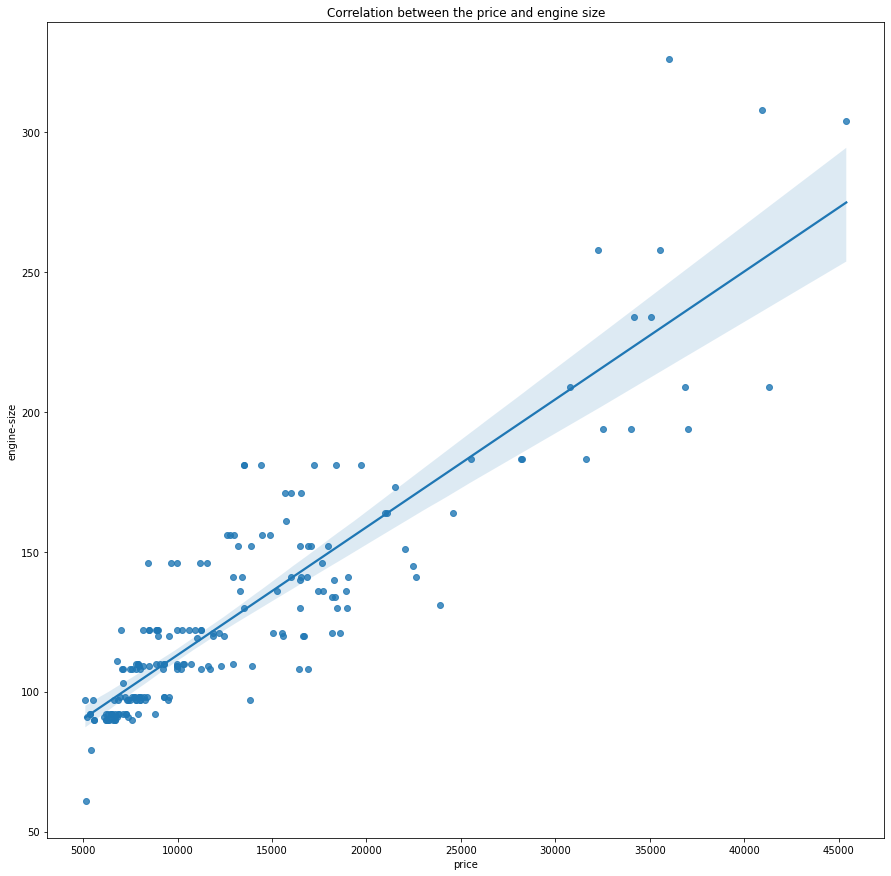

In [71]:
#Show the corrolation between the price and some of the top influencers
fig = plt.figure(figsize = (15,15))
sns.regplot(data = data, x = "price", y = "engine-size")
plt.title("Correlation between the price and engine size")
plt.savefig("corr_price_engine.png")
fig.show()

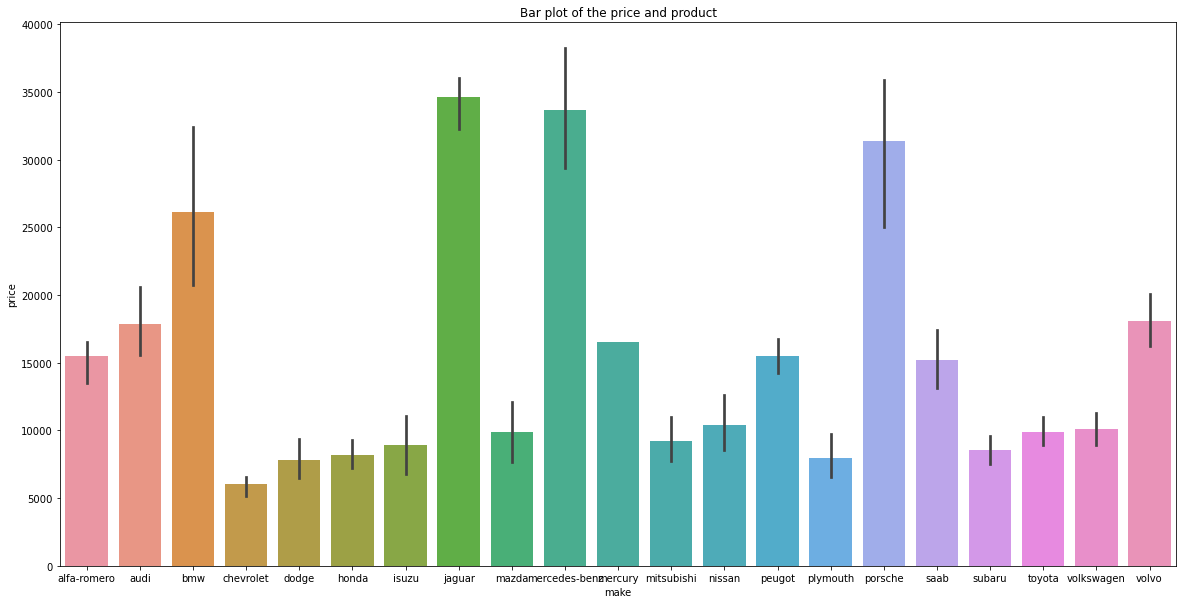

In [72]:
#Plot the make and the price to know the product that has highest price
fig = plt.figure(figsize = (20,10))
sns.barplot(x="make",y="price",data=data)
plt.title("Bar plot of the price and product")
plt.savefig("price_carmake_plot.png")
plt.show()

This shows that Jaguar has the highest price, in the next plot we will show if the jaquar also have the highest engine size

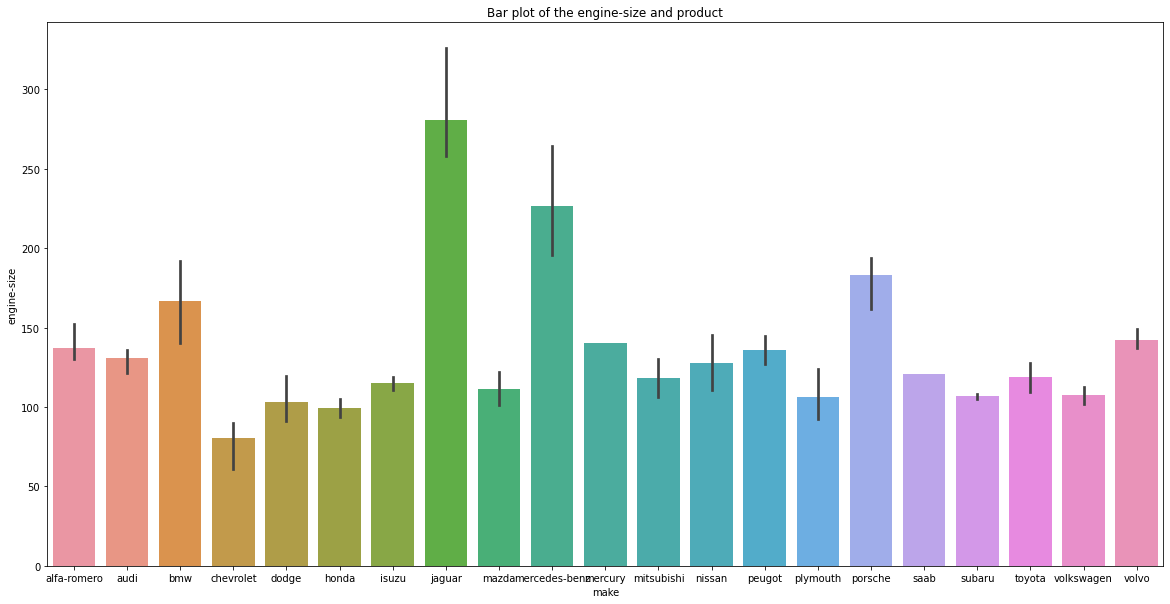

In [73]:
#Plot the make and the ENGINE SIZE to know the product that has highest engine size and if it rhyme with the higher price
fig = plt.figure(figsize = (20,10))
sns.barplot(x="make",y="engine-size",data=data)
plt.title("Bar plot of the engine-size and product")
plt.savefig("enginesize_carmake.png")
plt.show()

This shows that Jaquar also has the highest engine size which obviously has influence on the price

In [67]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')